Project Objective: Develop logistic regression, decision tree and neural network
models that will identify whether stores will perform well or poorly.


# Improting Libaries


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
#Loading Dataset
store_data = pd.read_excel(r'Downloads/storedata.csv')

In [3]:
store_data.head() #show data form top

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


In [4]:
store_data.tail() #show data from last 

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
131,South Benfleet,UK,96853,Vitï¿½ria,7,14120,110,Yes,13,Retail Park,1665074,1240813,1141898,1041041,6,202,18,14,Bad
132,Sandy,UK,96858,Matï¿½as,6,11205,103,No,15,Shopping Centre,1657769,1424404,1378708,1160929,5,203,13,18,Bad
133,Sheerness,UK,98062,Gustavo,7,16190,115,No,19,Shopping Centre,1407456,1359511,1200486,1063718,7,341,18,18,Bad
134,Salford,UK,98923,Rafael,6,15516,113,No,17,High Street,1451087,1245725,1127276,1045154,11,261,14,10,Bad
135,Stapleford,UK,99854,Lea,9,14468,111,Yes,18,High Street,1706344,1307752,1159859,1020940,8,276,18,13,Good


In [5]:
store_data.columns

Index(['Town', 'Country', 'Store ID', 'Manager name', 'Staff', 'Floor Space',
       'Window', 'Car park', 'Demographic score', 'Location',
       '40min population', '30 min population', '20 min population',
       '10 min population', 'Store age', 'Clearance space',
       'Competition number', 'Competition score', 'Performance'],
      dtype='object')

In [6]:
store_data.shape

(136, 19)

In [7]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Town                136 non-null    object
 1   Country             136 non-null    object
 2   Store ID            136 non-null    int64 
 3   Manager name        136 non-null    object
 4   Staff               136 non-null    int64 
 5   Floor Space         136 non-null    int64 
 6   Window              136 non-null    int64 
 7   Car park            136 non-null    object
 8   Demographic score   136 non-null    int64 
 9   Location            136 non-null    object
 10  40min population    136 non-null    int64 
 11  30 min population   136 non-null    int64 
 12  20 min population   136 non-null    int64 
 13  10 min population   136 non-null    int64 
 14  Store age           136 non-null    int64 
 15  Clearance space     136 non-null    int64 
 16  Competition number  136 no

In [8]:
store_data.isnull().sum()

Town                  0
Country               0
Store ID              0
Manager name          0
Staff                 0
Floor Space           0
Window                0
Car park              0
Demographic score     0
Location              0
40min population      0
30 min population     0
20 min population     0
10 min population     0
Store age             0
Clearance space       0
Competition number    0
Competition score     0
Performance           0
dtype: int64

In [9]:
store_data.describe()

,Store ID,Staff,Floor Space,Window,Demographic score,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score
count,136.000000,136.000000,136.000000,136.000000,136.000000,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,136.000000,136.000000,136.000000,136.000000
mean,52172.580882,13.352941,15024.095588,112.044118,14.463235,1.487374e+06,1.249870e+06,1.134533e+06,1.066118e+06,6.529412,262.426471,14.463235,14.808824
std,28725.990237,56.592439,2761.801921,6.884085,2.874944,2.804989e+05,2.160875e+05,1.490280e+05,8.884585e+04,2.815147,51.724288,2.895483,2.955258
min,1437.000000,-2.000000,10072.000000,100.000000,10.000000,1.030405e+06,1.000653e+06,1.000214e+06,1.000002e+06,2.000000,200.000000,10.000000,10.000000
25%,24707.250000,6.000000,12793.000000,106.750000,12.000000,1.254949e+06,1.057284e+06,1.012573e+06,1.005593e+06,4.000000,220.750000,12.000000,13.000000
50%,56011.500000,7.000000,14596.500000,111.000000,14.500000,1.516338e+06,1.214459e+06,1.077542e+06,1.033228e+06,6.000000,249.000000,15.000000,15.000000
75%,76870.500000,8.000000,17543.750000,118.000000,17.000000,1.696352e+06,1.396967e+06,1.203077e+06,1.090349e+06,9.000000,292.250000,17.000000,18.000000
max,99854.000000,600.000000,19869.000000,124.000000,19.000000,1.997044e+06,1.929089e+06,1.723395e+06,1.426533e+06,11.000000,408.000000,19.000000,19.000000


In [10]:
store_data['Performance'].value_counts()

Good    69
Bad     67
Name: Performance, dtype: int64

In [11]:
store_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store ID,136.0,5.217258e+04,28725.990237,1437.0,24707.25,56011.5,76870.50,99854.0
Staff,136.0,1.335294e+01,56.592439,-2.0,6.00,7.0,8.00,600.0
Floor Space,136.0,1.502410e+04,2761.801921,10072.0,12793.00,14596.5,17543.75,19869.0
Window,136.0,1.120441e+02,6.884085,100.0,106.75,111.0,118.00,124.0
Demographic score,136.0,1.446324e+01,2.874944,10.0,12.00,14.5,17.00,19.0
40min population,136.0,1.487374e+06,280498.938383,1030405.0,1254949.25,1516337.5,1696352.50,1997044.0
30 min population,136.0,1.249870e+06,216087.516523,1000653.0,1057284.00,1214459.0,1396966.75,1929089.0
20 min population,136.0,1.134533e+06,149027.970296,1000214.0,1012572.75,1077542.0,1203076.75,1723395.0
10 min population,136.0,1.066118e+06,88845.853887,1000002.0,1005593.00,1033228.5,1090349.00,1426533.0
Store age,136.0,6.529412e+00,2.815147,2.0,4.00,6.0,9.00,11.0


In [12]:
store_data['Country'].value_counts()

UK        134
France      2
Name: Country, dtype: int64

# Exploratory Data Analysis

In [13]:
store_data.head(5)

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
#Removing Warnings
import warnings
warnings.filterwarnings('ignore')


Good    69
Bad     67
Name: Performance, dtype: int64


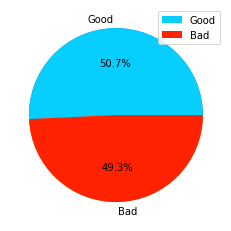

In [16]:
print(store_data['Performance'].value_counts())
plt.pie(store_data['Performance'].value_counts())
plt.pie(store_data['Performance'].value_counts(),labels=['Good','Bad'],colors=['#06CEFF','#FF2200'],autopct='%.1f%%')
plt.legend()
plt.show()

In the above pie chat there is  an Perfomance in which 50.7% are Good Performance Data and 49.3% are Bad Performance Data

<AxesSubplot:xlabel='Location', ylabel='count'>

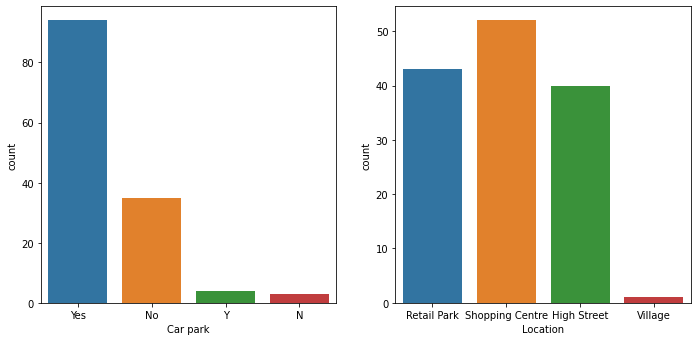

In [17]:
#Count Plot
fig = plt.figure(figsize = (18,12))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = store_data, x = 'Car park', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = store_data, x = 'Location', ax=ax2)


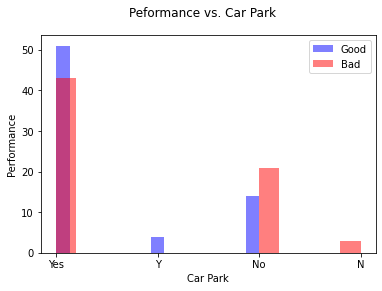

In [18]:
#Sub Plot
fig, ax = plt.subplots()

ax.hist(store_data[store_data["Performance"]=='Good']["Car park"], bins=15, alpha=0.5, color="blue", label="Good")
ax.hist(store_data[store_data["Performance"]=='Bad']["Car park"], bins=15, alpha=0.5, color="red", label="Bad")

ax.set_xlabel("Car Park")
ax.set_ylabel("Performance")

fig.suptitle("Peformance vs. Car Park")

ax.legend();

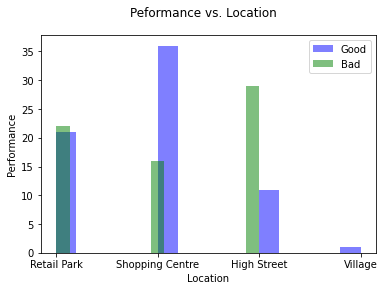

In [19]:
store_data#Sub Plot
fig, ax = plt.subplots()

ax.hist(store_data[store_data["Performance"]=='Good']["Location"], bins=15, alpha=0.5, color="blue", label="Good")
ax.hist(store_data[store_data["Performance"]=='Bad']["Location"], bins=15, alpha=0.5, color="green", label="Bad")

ax.set_xlabel("Location")
ax.set_ylabel("Performance")

fig.suptitle("Peformance vs. Location")

ax.legend();

From above plot we can say that people prefer to visit store that have car parking and store is in shopping centre From above plot we can see that store in shopping centre has Good Performance and Store in High Street has Bad Perforance

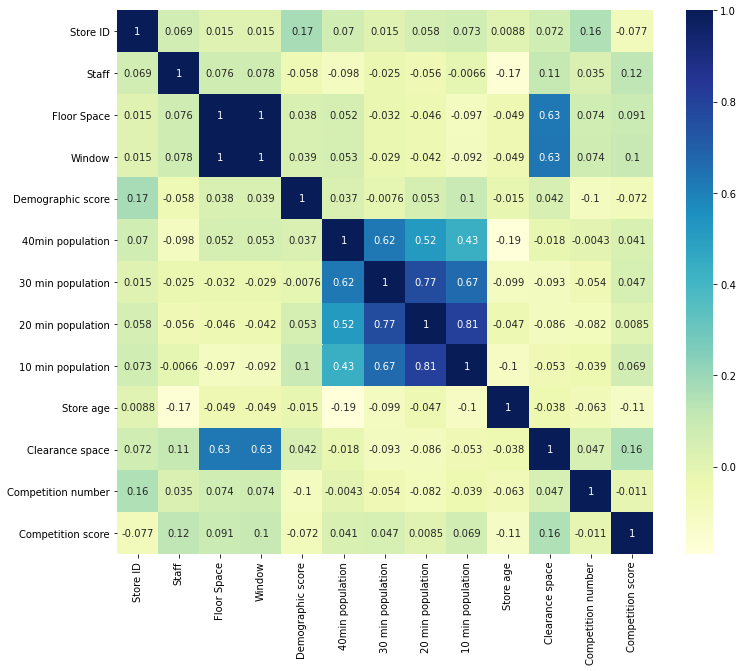

In [20]:
#Correlation 
#Displaying Correlation between varaibles using heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
cor = store_data.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.show()

In [21]:
#This function filters out most correlated variables, threshold values is decided by us like 80% or more than that 
def correlation(store_data,threshold):
    col_corr = set()
    corr_matrix = store_data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]#getting the name of column
                col_corr.add(colname)
    return col_corr

In [22]:
#Getting ALL feature who are correlated to each other and had correlation values more than 80%
corr_feature = correlation(store_data, 0.75)
len(set(corr_feature))

3

In [23]:
#Displaying all highly correlated variables
print(corr_feature)

{'20 min population', 'Window', '10 min population'}


In [24]:
#Dropping all correlated variables because they all are having same effects over target variables and have no use in model building
store_data.drop(corr_feature,axis=1,inplace=True)

In [25]:
store_data.shape


(136, 16)

On the basies of Pearson Correlation we have done the Features Selection and the Features having Correlation Values more the 75% so we dropped that dataset as they are  similer effect over target varible 

# Feature Engineering

In [26]:
#dropping columns that will not add any value to prediction 
store_data.drop(labels=['Town','Country','Store ID','Manager name'],axis=1,inplace=True) 

In [27]:
#Converting Y to Yes and N to No
store_data['Car park'] = store_data['Car park'].replace({'Y':'Yes','N':'No'})

In [28]:
store_data['Car park'].unique()

array(['Yes', 'No'], dtype=object)

In [29]:
store_data

,Staff,Floor Space,Car park,Demographic score,Location,40min population,30 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,9,18526,Yes,10,Retail Park,1288374,1138224,3,238,16,16,Good
1,8,18569,Yes,11,Shopping Centre,1086225,1015321,4,384,15,19,Good
2,-2,12288,No,12,Retail Park,1595638,1281661,11,219,13,18,Bad
3,7,17092,No,14,High Street,1179395,1022959,5,261,15,12,Bad
4,7,11307,No,18,Retail Park,1398558,1085170,7,200,19,13,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...
131,7,14120,Yes,13,Retail Park,1665074,1240813,6,202,18,14,Bad
132,6,11205,No,15,Shopping Centre,1657769,1424404,5,203,13,18,Bad
133,7,16190,No,19,Shopping Centre,1407456,1359511,7,341,18,18,Bad
134,6,15516,No,17,High Street,1451087,1245725,11,261,14,10,Bad


In [31]:
#Getting list of categorical variable
objList = store_data.select_dtypes(include = "object").columns
print (objList)

Index(['Car park', 'Location', 'Performance'], dtype='object')


In [36]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Converting all categorical variable to numerical values
for feat in objList:
    store_data[feat] = le.fit_transform(store_data[feat])


In [37]:
store_data.head()

,Staff,Floor Space,Car park,Demographic score,Location,40min population,30 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,9,18526,1,10,1,1288374,1138224,3,238,16,16,1
1,8,18569,1,11,2,1086225,1015321,4,384,15,19,1
2,-2,12288,0,12,1,1595638,1281661,11,219,13,18,0
3,7,17092,0,14,0,1179395,1022959,5,261,15,12,0
4,7,11307,0,18,1,1398558,1085170,7,200,19,13,0


# Data Preparation, Scaling and Spliting

In [39]:
# Distinguish the feather and target set and divide the data set  into training and test sets
X = store_data.drop('Performance', axis='columns')
y = store_data['Performance']


In [41]:
from sklearn.preprocessing import MinMaxScaler  # have to impoort MinMaxScaler for Normilization

In [44]:
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
X = trans.fit_transform(X)

In [45]:
from sklearn.model_selection import train_test_split # importing train_test_splits for training and test the data set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((108, 11), (28, 11), (108,), (28,))

Used MinMax Scaler to Normalize the value between [0,1]


# Model Building

 Decision Tree Classifier

In [50]:
#applying grid search cv to find the best hyper parameters for model
from sklearn.model_selection import RandomizedSearchCV

# Fit models
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

In [51]:
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "max_features": range(1, 9),
              "min_samples_leaf": range(1, 9),
              "criterion": ["gini", "entropy"]}
  
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()

In [52]:
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
  
tree_cv.fit(X_train, y_train)
  

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': range(1, 9),
                                        'min_samples_leaf': range(1, 9)})

In [53]:
  # Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 4, 'max_features': 8, 'max_depth': 3, 'criterion': 'entropy'}
Best score is 0.6952380952380952


In [55]:
#Prediction using Test Dataste
y_pred = tree_cv.predict(X_test)

In [57]:
# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [58]:
#Accuracy on the basis of predicted values with respective to true values
dt_acc = accuracy_score(y_test,y_pred)
dt_acc

0.6071428571428571

Text(69.0, 0.5, 'Truth')

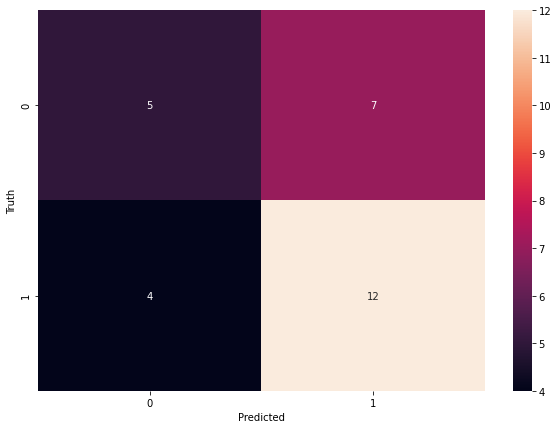

In [59]:
# Confusion Matrix

import seaborn as sn
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Logistic Regression

In [61]:
# Fitting Logistic Regression

LogReg = LogisticRegression()

In [62]:
C = np.logspace(0, 4, num=10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)

In [63]:
randomizedsearch = RandomizedSearchCV(LogReg, hyperparameters)
best_model_random = randomizedsearch.fit(X_train, y_train)
print(best_model_random.best_estimator_)

LogisticRegression(C=59.94842503189409, penalty='l1', solver='liblinear')


In [64]:
#Predict values based on new parameters
y_pred_lr = randomizedsearch.predict(X_test)

In [65]:
# New Model Evaluation metrics 
lr_acc = accuracy_score(y_test, y_pred_lr)
lr_acc

0.8214285714285714

Text(69.0, 0.5, 'Truth')

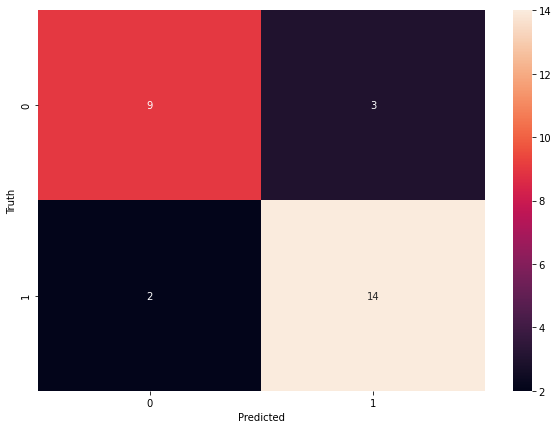

In [67]:
 #Confusion Matrix

import seaborn as sn
cm = confusion_matrix(y_test,y_pred_lr)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Displaying the Result of All the three classifier Used.

In [71]:
#Getting accuracy and log loss for each model
model_data = pd.DataFrame({'Classifiers' : ['LogisticRegression', 'DecisionTreeClassifier'],
                        'Accuracy %' : [lr_acc,dt_acc]})

In [72]:
model_data['Accuracy %'] = model_data['Accuracy %'].apply(lambda x : round((x*100),2))

In [73]:
model_data

,Classifiers,Accuracy %
0,LogisticRegression,82.14
1,DecisionTreeClassifier,60.71


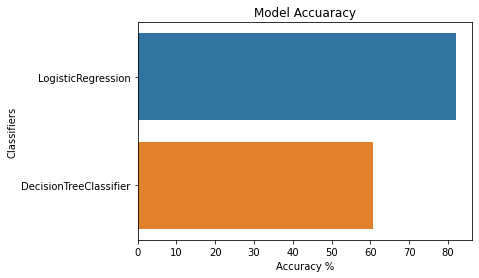

In [76]:
#Visualizing the accuracy and log loss of each model
sns.barplot(data =model_data, x = model_data['Accuracy %'], y = model_data.Classifiers)
plt.title('Model Accuaracy')
plt.show()

From above Results we can say that Logistic Regression works well as it gains an accuracy score of 82.14% and rest algorithms Decision Tree Classifier attains an accuracy score of 60.71% .

In this project we got the insides that people prefer to visit store that have car parking and store is in shopping centre and store in shopping centre has Good Performance and Store in High Street has Bad Perforance